#### 2023/12/13 公開データセットirisを使い、t-SNEとUMAPの特性を調べる

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns
import umap
from sklearn.manifold import TSNE

palette = ['#CC521D', '#4F4AD7', '#39AE3D']

##### ▶そのまま

In [3]:
iris = datasets.load_iris()
df_org = pd.DataFrame(iris.data, columns=iris.feature_names)
df_org['target'] = iris.target

##### ▶品種0のみ2,3列目を交換

In [4]:
iris = datasets.load_iris()
df_df0chgcol = pd.read_excel('../temp/iris_df0chgcol.xlsx', index_col=0)

##### ▶品種0のみ2,3列目を交換 & 品種0と品種2に品種1の中央値を足し引き

In [5]:
iris = datasets.load_iris()
df_plusmed = pd.read_excel('../temp/iris_df0chgcol_plus_med.xlsx', index_col=0)

##### ▶品種0のみを増殖し、1234列を4321列に変換する

In [6]:
iris = datasets.load_iris()
df_df0inverse = pd.read_excel('../temp/iris_target0_1234to4321.xlsx', index_col=0)
palette = ['#CC521D', '#4F4AD7', '#39AE3D', '#ED7EE0']

##### ▶全品種のデータ量を2倍 vs データ量2倍=>+各品種のデータの最小値

In [30]:
iris = datasets.load_iris()
df_org = pd.DataFrame(iris.data, columns=iris.feature_names)
df_org['target'] = iris.target

df_org_copy = df_org.copy()

df0 = df_org_copy[df_org_copy['target'] == 0]
df1 = df_org_copy[df_org_copy['target'] == 1]
df2 = df_org_copy[df_org_copy['target'] == 2]

df0_minusmin = pd.DataFrame({})
df1_minusmin = pd.DataFrame({})
df2_minusmin = pd.DataFrame({})
for col in df_org_copy.columns:
    df0_new_ser = [ val + 1 for val in df0[col]]
    df1_new_ser = [ val + 1 for val in df1[col]] 
    df2_new_ser = [ val + 1 for val in df2[col]]
    df0_minusmin[col] = df0_new_ser
    df1_minusmin[col] = df1_new_ser
    df2_minusmin[col] = df2_new_ser
df_minusmin = pd.concat([df0_minusmin , df1_minusmin ,df2_minusmin], axis=0)

# df_twice = pd.concat([df_org, df_org], axis=0)
df_twice_minusmin = pd.concat([df_org, df_minusmin], axis=0)
# df_twice.to_excel('../temp/iris_twice.xlsx')
df_twice_minusmin.to_excel('../temp/iris_twice_plus3.xlsx')

In [31]:
df_twice_read = pd.read_excel('../temp/iris_twice.xlsx', index_col=0)
df_twice_mm_read = pd.read_excel('../temp/iris_twice_plus1.xlsx', index_col=0)
palette = ['#CC521D', '#4F4AD7', '#39AE3D', '#ED7EE0', '#6606F6', '#65E30B']

<AxesSubplot: xlabel='axis0', ylabel='axis1'>

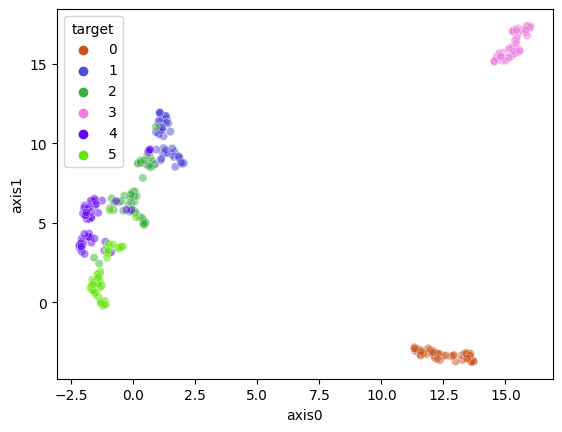

In [32]:
##### 圧縮対象df #####
df_map = df_twice_mm_read

##### ndarrayに変換 #####
ser_target = df_map['target']
df_map = df_map.drop('target', axis=1)
input_ndarray = df_map.to_numpy()
df_map['target'] = ser_target

##### 調整可能パラメータ #####
n_neighbors = [ i for i in range(2, 201, 1)]
min_dist = [ i*0.01 for i in range(0, 100, 1)]

##### マッピング #####
# for param in n_neighbors:
mapper = umap.UMAP(n_components=2, 
                n_neighbors=15,
                min_dist=0.1,
                metric = "euclidean"
                )
umap_result = mapper.fit_transform(input_ndarray)

df_map['axis0'] = umap_result[:, 0:1]
df_map['axis1'] = umap_result[:, 1:2]

sns.scatterplot(x='axis0', y='axis1', hue=df_map['target'], data=df_map, palette=palette, alpha=0.5)
# plt.savefig(f'../temp/umap_iris_1234to4321_nneigh_45/mindist_{param}.jpg')
# plt.savefig(f'../temp/umap_iris_1234to4321_mindist_01/nneigh_{param}.jpg')
# plt.close()
# print(param, '完了!!')

##### ▶t-SNE

<AxesSubplot: xlabel='axis0', ylabel='axis1'>

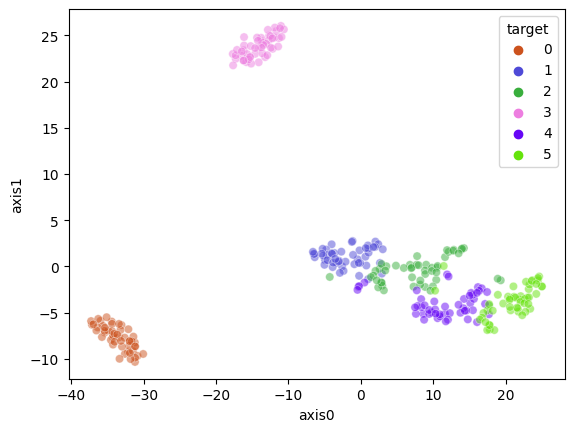

In [33]:
##### 圧縮対象df #####
df_map = df_twice_mm_read

##### ndarrayに変換 #####
ser_target = df_map['target']
df_map = df_map.drop('target', axis=1)
input_ndarray = df_map.to_numpy()
df_map['target'] = ser_target

##### 調整可能パラメータ #####
perplexity = [ i for i in range(5, 51, 1)]
n_iter = [ i for i in range(250, 1010, 10)]

##### マッピング #####
# for param in perplexity:
tsne_model = TSNE(
                n_components=2,
                perplexity=30,
                early_exaggeration=12.0, 
                learning_rate='auto',
                n_iter=1000,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                metric_params=None,
                init='pca',
                verbose=0,
                random_state=None, 
                method='barnes_hut',
                angle=0.5,
                n_jobs=None
                )

tsne_result = tsne_model.fit_transform(input_ndarray)

df_map[f'axis0'] = tsne_result[:, 0:1]
df_map[f'axis1'] = tsne_result[:, 1:2]

sns.scatterplot(x='axis0', y='axis1', hue=df_map['target'], data=df_map, palette=palette, alpha=0.5)
# plt.savefig(f'../temp/tsne_iris_1234to4321_perp_30/niter_{param}.jpg')
# plt.savefig(f'../temp/tsne_iris_1234to4321_niter_1000/perp_{param}.jpg')
# plt.close()
# print(param)